# Consumption at Home

ℹ️   Analyse consumption of Gas / Water and Electricity at home

Before start, make sure you rename `config.ini.example` into `config.ini` and adjust all the config's values.

❗️  This will download CSV file from the remove url. Checkout [this guide](https://www.labnol.org/internet/direct-links-for-google-drive/28356/#google-sheets---export-links) if you wish to get the proper link to download CSV directly from Google Sheets.

In [4]:
import configparser

# Load settings

config = configparser.ConfigParser()
config.read('config.ini')
config.sections()

typeColumn = config['MAIN']['TypeColumnName']
timeColumn = config['MAIN']['TimeColumnName']
valueColumn = config['MAIN']['ValueColumnName']
daysAgoRange = config['MAIN']['daysAgoRange']
csvUrl = config['MAIN']['FileUrl']

print('Config was loaded.')

Config was loaded.


In [5]:
import pandas as pd
import requests
import io

# Download CSV

r = requests.get(csvUrl)
if r.ok:
    data = r.content.decode('utf8')
    df = pd.read_csv(io.StringIO(data), dayfirst=True, parse_dates=True)
    print("Data downloaded!")

Data downloaded!


In [6]:
# Drop hidden columns
# NB: Feel free to comment these lines out. This was necessary for me because I had that in my CSV file
del df['Дата']
del df['Пометка']

In [7]:
# Check out what we have
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Тип показания    63 non-null     object
 1   Отметка времени  63 non-null     object
 2   Показание        63 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [8]:
# and the data
df.head()

,Тип показания,Отметка времени,Показание
0,Вода,31.12.2019,497
1,Электричество,31.12.2019,66891
2,Газ,05.02.2020,49922
3,Вода,05.02.2020,520
4,Газ,04.03.2020,50247


In [9]:
# let's convert timeColumn into date format to work with later
df[timeColumn] = pd.to_datetime(df[timeColumn], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Тип показания    63 non-null     object        
 1   Отметка времени  63 non-null     datetime64[ns]
 2   Показание        63 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [10]:
# and check that all the dates were converted properly
df

,Тип показания,Отметка времени,Показание
0,Вода,2019-12-31,497
1,Электричество,2019-12-31,66891
2,Газ,2020-02-05,49922
3,Вода,2020-02-05,520
4,Газ,2020-03-04,50247
...,...,...,...
58,Вода,2021-02-10,870
59,Вода,2021-03-11,890
60,Вода,2021-04-12,915
61,Вода,2021-05-13,965


In [11]:
# Select consumption type
consumptionType = input("Select a type:")
print("Chosen type is " + consumptionType)

Select a type: Вода


Chosen type is Вода


In [12]:
# Filter out data by chosen type
dataByType = df[df[typeColumn] == consumptionType]

In [13]:
print("Examples of records in the filtered dataset:")
dataByType.head()

Examples of records in the filtered dataset:


,Тип показания,Отметка времени,Показание
0,Вода,2019-12-31,497
3,Вода,2020-02-05,520
5,Вода,2020-03-04,538
8,Вода,2020-04-04,563
10,Вода,2020-05-01,586


In [14]:
from datetime import date
from datetime import datetime as dtObj
import datetime

# filter for daysAgoRange days ago
daysAgo = date.today() - datetime.timedelta(days=int(daysAgoRange))
today = date.today()
dt = dtObj(daysAgo.year, daysAgo.month, daysAgo.day)
dtToday = dtObj(today.year, today.month, today.day)
print('Filter data for the last', daysAgoRange, 'day(s), from', dt, 'to', dtToday)

# Filter out for the dates
dateFilterdDf = dataByType[(dataByType[timeColumn] >= dt) & (dataByType[timeColumn] <= dtToday)]
dateFilterdDf

Filter data for the last 365 day(s), from 2020-09-10 00:00:00 to 2021-09-10 00:00:00


,Тип показания,Отметка времени,Показание
34,Вода,2020-10-04 00:00:00,721
37,Вода,2020-10-17 00:00:00,732
41,Вода,2020-10-29 00:00:00,742
48,Вода,2021-09-04 19:53:08,998
55,Вода,2020-11-07 00:00:00,755
56,Вода,2020-12-08 00:00:00,800
57,Вода,2021-01-09 00:00:00,845
58,Вода,2021-02-10 00:00:00,870
59,Вода,2021-03-11 00:00:00,890
60,Вода,2021-04-12 00:00:00,915


In [15]:
# Convert dates into strings and make them more readable
#   so that we can just display them in the plot later
def format_date(x):
    return x.strftime("%b %y")

dateFilterdDf[timeColumn] = dateFilterdDf[timeColumn].apply(format_date)
dateFilterdDf

/var/folders/_t/qtcpf30514z2vrjpw8lbg_4m0000gp/T/ipykernel_33011/2882709966.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dateFilterdDf[timeColumn] = dateFilterdDf[timeColumn].apply(format_date)


,Тип показания,Отметка времени,Показание
34,Вода,Oct 20,721
37,Вода,Oct 20,732
41,Вода,Oct 20,742
48,Вода,Sep 21,998
55,Вода,Nov 20,755
56,Вода,Dec 20,800
57,Вода,Jan 21,845
58,Вода,Feb 21,870
59,Вода,Mar 21,890
60,Вода,Apr 21,915


In [16]:
# Drop unneeded column with type
del dateFilterdDf[typeColumn]

In [17]:
# Group by month and select min of each group to get 1 record per month to work with
# We take min to make sure we take the closest record to the beginning of the month 
idx = dateFilterdDf.groupby([timeColumn], sort=False)[valueColumn].transform(min) == dateFilterdDf[valueColumn]
grouppedDf = dateFilterdDf[idx]
grouppedDf

,Отметка времени,Показание
34,Oct 20,721
48,Sep 21,998
55,Nov 20,755
56,Dec 20,800
57,Jan 21,845
58,Feb 21,870
59,Mar 21,890
60,Apr 21,915
61,May 21,965
62,Aug 21,974


In [18]:
# To make sure we have all months sorted correctly, we sort it by valueColumn
# We do so as we know that counter value is always a cummulative sum, so it always growths.
sortedDf = grouppedDf.sort_values(by=[valueColumn])
sortedDf

,Отметка времени,Показание
34,Oct 20,721
55,Nov 20,755
56,Dec 20,800
57,Jan 21,845
58,Feb 21,870
59,Mar 21,890
60,Apr 21,915
61,May 21,965
62,Aug 21,974
48,Sep 21,998


In [19]:
import matplotlib.pyplot as plt

In [20]:
# Because all the values are a cummulative sum, we extract diff between neighbours
# and set the index to move sure the .diff will not complain about strings in timeColumn
diffDf = sortedDf.set_index(timeColumn).diff()
diffDf

,Показание
Отметка времени,
Oct 20,NaN
Nov 20,34.0
Dec 20,45.0
Jan 21,45.0
Feb 21,25.0
Mar 21,20.0
Apr 21,25.0
May 21,50.0
Aug 21,9.0


In [21]:
# Remove index to make it easier to draw a plot
diffDfWithoutIndex = diffDf.reset_index(level=0)
diffDfWithoutIndex

,Отметка времени,Показание
0,Oct 20,NaN
1,Nov 20,34.0
2,Dec 20,45.0
3,Jan 21,45.0
4,Feb 21,25.0
5,Mar 21,20.0
6,Apr 21,25.0
7,May 21,50.0
8,Aug 21,9.0
9,Sep 21,24.0


In [22]:
# Drop first row that is NaN anyway and so has no any valuable data for us.
#dfWithoutFirstAndLastRows = diffDfWithoutIndex.drop(diffDfWithoutIndex.tail(1).index) # drop last n rows
dfWithoutFirstRow = diffDfWithoutIndex.drop(diffDfWithoutIndex.head(1).index) # drop first n rows
dfWithoutFirstRow

,Отметка времени,Показание
1,Nov 20,34.0
2,Dec 20,45.0
3,Jan 21,45.0
4,Feb 21,25.0
5,Mar 21,20.0
6,Apr 21,25.0
7,May 21,50.0
8,Aug 21,9.0
9,Sep 21,24.0


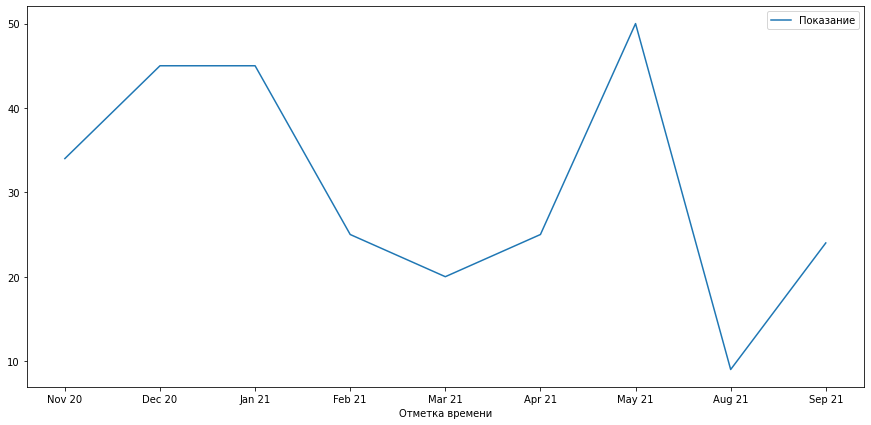

In [28]:
# Draw the plot
ax = dfWithoutFirstRow.plot(x = timeColumn, y = valueColumn, figsize=(15,7))

# Make sure we display all the dates in X
ax.set_xticks(list(range(0, len(dfWithoutFirstRow[timeColumn]))))
ax.set_xticklabels(dfWithoutFirstRow[timeColumn]);